# Supervised Learning with scikit-learn (cont.)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

### CLASS IMBALANCES AND METRICS OTHER THAN ACCURACY

Accuracy is not always a useful metric when evaluating the performance of a model. It simply represents a fraction of correctly classified samples.

Say we have a classification model for predicting fraudulent bank transactions. 99% of the data fed to the model are legitimate transactions and only the remaining 1% is fraudulent. That model could become a classifier that predicts non-fraudulent bank transactions and would be 99% accurate. However, it would perform terribly at actually predicting fraudulent transactions, which defeats its original purpose. 

This is called **class imbalance**, where a certain class in a dataset has significantly more observations/datapoints than another, creating a disproportionate ratio between classes.

##### The Confusion Matrix
A confusion matrix is a 2x2 table that compares predictions made by a model and the actual values. It allows us to view the proportion of correct classifications, false positives, and false negatives.

&ensp;

For the bank transaction model, it would look something like this:

|                 | Predicted Legitimate |Predicted Fraudulent|
|-----------------|----------------------|--------------------|
|Actual Legitimate|  True Negative (TN)  | False Positive (FP)|
|Actual Fraudulent|  False Negative (FN) | True Positive (TP) |

*Note that a legitimate prediction is referred to as 'negative', as in NOT a fraudulent transaction.*

&ensp;
From this matrix, the following metrics can be computed:

&ensp;
1. **Accuracy**: Simply the proportion of correct predictions. 

&ensp;&ensp;&ensp;&ensp;&ensp;$accuracy = \frac{tp + tn}{tp + tn + fp + fn}$

2. **Precision**: Refers to how many positive predictions made by a model are actually correct. (*Out of the predicted positives, how many are correct?*)

&ensp;&ensp;&ensp;&ensp;&ensp;$precision = \frac{tp}{tp + fp}$

&ensp;&ensp;&ensp;&ensp;&ensp;Also, note that a higher precision would mean a lower false positive rate. 

3. **Recall**: Refers to how many of the actual positive cases a model has correctly identified. (*Out of the actual positives, how many were caught?*)

&ensp;&ensp;&ensp;&ensp;&ensp;$recall = \frac{tp}{tp + fn}$

&ensp;&ensp;&ensp;&ensp;&ensp;Higher recall means a lower false negative rate.

4. **F1 Score**: A metric that balances precision and recall into a single value. It is the harmonic mean of precision and recall. F1 is simply a balance between both values.

&ensp;&ensp;&ensp;&ensp;&ensp; $F1 Score = \frac{precision \cdot recall}{precision + recall}$


&ensp;
In application, you would want to use precision to evaluate your model if false positives are costly, such as fraud detection where legitimate transactions may get blocked (false positive). If false negatives are risky or dangerous, such as predicting the presence of cancer in patients, then recall is the better metric, since you would not want a case of malignancy to go undiagnosed (false negative). F1 Score, on the other hand, is somewhat of a middle ground. It generalizes recall and precision into a single value and should only be used if none of the error types pose greater risk than the other. 


&ensp;&ensp;

Below is a demonstration of using the confusion matrix on the churn dataset.

In [2]:
telco_churn = pd.read_csv('../Data/telecom_churn_clean.csv')
telco_churn.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
# Define X and y
pred_X = telco_churn.drop('churn', axis=1).values
target_y = telco_churn['churn'].values

In [4]:
from sklearn.neighbors import KNeighborsClassifier   # The KNN classifier
from sklearn.metrics import classification_report, confusion_matrix   # Import confusion matrix and classification report for metrics
from sklearn.model_selection import train_test_split

# Here, we are deliberately not using the 'stratify' argument to induce a class imbalance
X_train, X_test, y_train, y_test = train_test_split(pred_X, target_y, test_size=0.4, random_state=10) 

telco_knn = KNeighborsClassifier(n_neighbors=7)
telco_knn.fit(X_train, y_train)
y_pred = telco_knn.predict(X_test)

c:\Users\Derek\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Derek\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Derek\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Derek\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Derek\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [5]:
# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1150    5]
 [ 167   12]]


In [6]:
# Metrics can be calculated manually 
tn = conf_mat[0,0]
fp = conf_mat[0,1]
fn = conf_mat[1,0]
tp = conf_mat[1,1]

accuracy = (tn + tp) / (tn + fp + fn + tp)
precision = tp / (fp + tp)
recall = tp / (tp + fn)
f1_score = (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1_score}')

Accuracy: 0.8710644677661169
Precision: 0.7058823529411765
Recall: 0.0670391061452514
F1 Score: 0.06122448979591836


In [7]:
# Metrics can also be calculated automatically with classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1155
           1       0.71      0.07      0.12       179

    accuracy                           0.87      1334
   macro avg       0.79      0.53      0.53      1334
weighted avg       0.85      0.87      0.82      1334



### LOGISTIC REGRESSION AND THE ROC CURVE
A logistic regression model is commonly used for classification problems (often binary). It outputs the probability $p$ that an observation belongs to a binary class.

When implementing logistic regression, we apply a probability threshold to label certain predictions as binary classes. Note that the default threshold is $0.5$. Using the womens' health dataset for diabetes prediction, we make the following assignments:

- If $p > 0.5$, label it as 1 to denote that a patient likely has diabetes
- If $p < 0.5$, label it as 0 to denote that a patient likely does not have diabetes

*Note that a logistic regression model produces a linear decision boundary. Look it up online for reference.*

In [12]:
womens_health = pd.read_csv('../Data/diabetes_clean.csv')
womens_health.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
pred_X = womens_health['glucose'].values
pred_X = pred_X.reshape(-1, 1)
target_y = womens_health['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(pred_X, target_y, test_size=0.3, random_state=10)

In [17]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

# Using telco churn data train-test split
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [27]:
# Storing the probabilities
# Slicing to only get probability for positive predictions
pred_probabilities = logit_model.predict_proba(X_test)[:, 1]

##### The ROC Curve
Note that a probability threshold is not exclusive to logistic regression as other models such as KNN classifiers can hhave thresholds too. We would also like to know what would happen if we vary the threshold.

The **Receiver Operating Characteristic (ROC)** curve is a plot that shows the performance of a binary classifier model by comparing the rate of true positive predictions (sensitivity) and the rate of false positive predictions (1-specificity) at varying levels of probability thresholds.


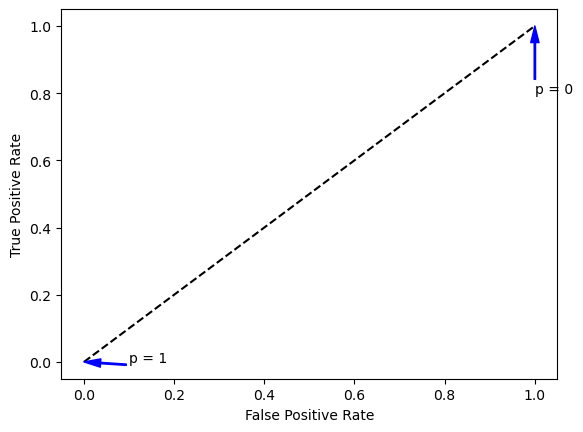

In [47]:
x_axis = np.linspace(0.0, 1.0, 50)
y_axis = x_axis

fig, ax = plt.subplots()

ax.plot(x_axis, y_axis, linestyle='--', color='black')
ax.annotate('p = 0', xy=(1.0, 1.0), xytext=(1.0, 0.8), arrowprops={'color':'blue', 'width':1, 'headwidth':6})
ax.annotate('p = 1', xy=(0.0, 0.0), xytext=(0.1, 0.0), arrowprops={'color':'blue', 'width':1, 'headwidth':6})

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The plot above represents a chance model that randomly guesses labels. Notice the two arrows denoting the TP and FP values for values $p$:
- If $p = 0$, the model predicts 1 for all observations. This means all positive values are predicted correctly but incorrectly predict negative values.
- If $p = 1$, the model predicts 0 for all observations. This means true and false positive rates become zero. (Opposite of above statement).

In [66]:
# Plotting an ROC curve in sklearn
from sklearn.metrics import roc_curve

# We unpack the return valuese of roc_curve()
# The variables represent our false and true positive rates and 
# the thresholds used to calculate each fpr-tpr pair
# We also pass the true y-values and predicted y-values
fpr, tpr, thresholds = roc_curve(y_test, pred_probabilities)

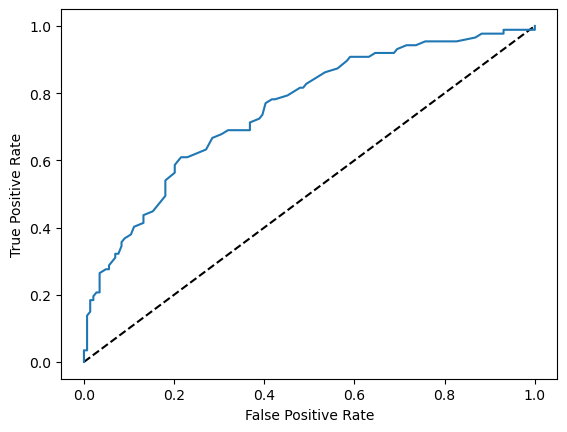

In [49]:
fig, ax = plt.subplots()

ax.plot(x_axis, y_axis, linestyle='--', color='black')
ax.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### ROC Area Under the Curve (AUC)
ROC AUC is another performance metric that measures a model's ability to tell apart positive and negative classes. The AUC is a scalar value between 0 and 1. A higher ROC AUC score (closer to 1) indicates a well-performing model whereas a score of 0.5 indicates a random guess.

In [57]:
# Calculating ROC AUC
from sklearn.metrics import roc_auc_score

# simply pass the true and predicted values
roc_auc = roc_auc_score(y_test, pred_probabilities)
pct_improvement = (roc_auc - 0.5) / (1.0 - 0.5)
print(roc_auc)
print(pct_improvement)

0.752234993614304
0.504469987228608


This shows that our logistic regression model got an ROC AUC score of $0.75$ which is a $50\%$ improvement over a model that makes random predictions.

##### Youden's J Statistic
Suppose we want to find the best probability threshold for our logistic regression model. We can use Youden's J statistic. It is defined as follows:

$ J = TPR - FPR$

Where:
- $J$ is the statistic to be maximized (best trade-off between senstivity and specificity)
- $TPR$ are true positives; and
- $FPR$ are the false positives

*Note that other sources may define Youden's J differently. In machine learning, it's usually defined the way it is.*

The statistic $J$ is maximized when $TPR$ is high and $FPR$ is low.

In [67]:
# Get the j-scores from the previous roc_curve() call
j_scores =  tpr - fpr

# We find the max j-score value and get its index 
# from the j-score array. Now, since the j_score array
# is symmetric to the threshold array, we use that index
# to retrieve the best threshold value in the threshold array
best_threshold = thresholds[np.argmax(j_scores)]
best_threshold

0.35512055127341985